## Calgary Rainfall Data Example

### DATA 601: Fall 2019 

#### Using pandas for tabular data wrangling and visualization

**Usman Alim ([ualim@ucalgary.ca](mailto:ualim@ucalgary.ca))** 

Data source:
[Raifall Data | City of Calgary Open Data Portal](https://data.calgary.ca/Environment/Rainfall-Data/d9kv-swk3)
Accessed: Sep. 17, 2019

In [1]:

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

## Tasks

- Read data into a `pandas` DataFrame.
- Cleanup the data to only retain valid rows.
- Parse out year and month information into separate columns.
- Build a hierarchical index so that data can be aggregated based on year and month.
- Produce visualizations of yearly and monthly rainfall totals.

In [2]:
# Load data and get familiar with the fields
# Although, pandas can parse dates for us, we'll do that ourselves.

rdata = pd.read_csv("./Historical_Rainfall.csv")
display(rdata.head())
display(rdata.tail())
display(rdata.describe())

for col in rdata.columns:
    print(col + ": " + str(rdata[col].dtype))
    

,CHANNEL,YEAR,TIMESTAMP,RAINFALL,RG_ACTIVE,ID
0,42,2019,2019/09/14 05:05:00 AM,0.2,Y,2019-09-14T05:05:00-42
1,42,2019,2019/09/14 01:45:00 AM,0.4,Y,2019-09-14T01:45:00-42
2,42,2019,2019/09/14 01:40:00 AM,0.4,Y,2019-09-14T01:40:00-42
3,48,2019,2019/09/13 10:45:00 AM,0.2,Y,2019-09-13T10:45:00-48
4,21,2019,2019/09/13 10:40:00 AM,0.2,Y,2019-09-13T10:40:00-21


,CHANNEL,YEAR,TIMESTAMP,RAINFALL,RG_ACTIVE,ID
889775,8,1988,1988/05/20 06:45:00 PM,0.2,Y,1988-05-20T18:45:00-08
889776,21,1988,1988/05/20 06:45:00 PM,0.2,Y,1988-05-20T18:45:00-21
889777,8,1988,1988/05/20 06:25:00 PM,0.2,Y,1988-05-20T18:25:00-08
889778,15,1988,1988/05/20 06:15:00 PM,0.2,Y,1988-05-20T18:15:00-15
889779,17,1988,1988/05/20 12:55:00 PM,0.2,Y,1988-05-20T12:55:00-17


,CHANNEL,YEAR,RAINFALL
count,889780.000000,889780.000000,889780.000000
mean,17.493284,2006.076129,0.317491
std,11.116896,8.781999,0.418900
min,1.000000,1988.000000,0.100000
25%,8.000000,1998.000000,0.200000
50%,16.000000,2008.000000,0.200000
75%,26.000000,2014.000000,0.200000
max,99.000000,2019.000000,43.200000


CHANNEL: int64
YEAR: int64
TIMESTAMP: object
RAINFALL: float64
RG_ACTIVE: object
ID: object


In [3]:
# Do clean up here. We'll retain only the rows for which the gauge 
# is active (RG_ACTIVE is Y). For all these rows, we'll parse out the 
# year and month information.

cdata = rdata[rdata['RG_ACTIVE'] == 'Y']
display(cdata.describe())

# Strip out the year and month from the 'YEAR' and 'TIMESTAMP'
# fields and build a new DataFrame with this information.
#
# Use the following to parse:
# dt.datetime.strptime(rdata['YEAR'][0], '%m/%d/%Y %I:%M:%S %p')

#yseries = cdata['YEAR'].map(lambda str: dt.datetime.strptime(str, '%m/%d/%Y  %I:%M:%S %p').strftime('%Y'))
yseries = cdata['YEAR']
mseries = cdata['TIMESTAMP'].map(lambda str: dt.datetime.strptime(str, '%Y/%m/%d  %I:%M:%S %p').strftime('%m'))

adata = pd.DataFrame({'CHANNEL' : cdata['CHANNEL'], 'YEAR' : yseries, 'MONTH' : mseries, 'RAINFALL' : cdata['RAINFALL']})

,CHANNEL,YEAR,RAINFALL
count,889780.000000,889780.000000,889780.000000
mean,17.493284,2006.076129,0.317491
std,11.116896,8.781999,0.418900
min,1.000000,1988.000000,0.100000
25%,8.000000,1998.000000,0.200000
50%,16.000000,2008.000000,0.200000
75%,26.000000,2014.000000,0.200000
max,99.000000,2019.000000,43.200000


In [4]:
display(adata.head())
display(adata.describe())
adata.CHANNEL.unique()

,CHANNEL,YEAR,MONTH,RAINFALL
0,42,2019,09,0.2
1,42,2019,09,0.4
2,42,2019,09,0.4
3,48,2019,09,0.2
4,21,2019,09,0.2


,CHANNEL,YEAR,RAINFALL
count,889780.000000,889780.000000,889780.000000
mean,17.493284,2006.076129,0.317491
std,11.116896,8.781999,0.418900
min,1.000000,1988.000000,0.100000
25%,8.000000,1998.000000,0.200000
50%,16.000000,2008.000000,0.200000
75%,26.000000,2014.000000,0.200000
max,99.000000,2019.000000,43.200000


array([42, 48, 21,  2, 23, 34,  5, 33, 31,  9, 47, 18, 29, 20, 35, 13, 16,
       14, 15, 27, 40, 17,  8, 28, 11, 19, 38, 46, 26, 44, 12, 30,  6,  1,
        4, 22, 36, 10,  7, 41, 37, 24, 43,  3, 32, 45, 99])

In [5]:
# Grouping should now be easy. We'll group by year, then month, then datalogger.

grouped = adata.groupby(['YEAR', 'MONTH','CHANNEL'])

# Now we can determine the total rainfall measured by each datalogger and work with that (multi-indexed) table

totalDL = grouped.sum()
display(totalDL.head())
display(totalDL.tail())


RAINFALL
YEAR MONTH CHANNEL          
1988 05    4             0.6
           6             4.0
           8             5.4
           9             5.6
           12            3.4

RAINFALL
YEAR MONTH CHANNEL          
2019 09    43           27.6
           44           21.0
           46           25.2
           47           26.2
           48           19.0

In [6]:
# Let's unstack to move the Datalogger to columns

finframe = totalDL.unstack()
display(finframe)

RAINFALL                                                          \
CHANNEL          1      2      3      4      5      6      7      8      9    
YEAR MONTH                                                                    
1988 05         NaN    NaN    NaN    0.6    NaN    4.0    NaN    5.4    5.6   
     06         NaN    NaN    NaN    NaN    6.2    1.8    NaN   14.4   28.8   
     07         NaN    NaN    NaN    NaN   28.2   21.4    NaN   23.2   32.4   
     08         NaN    1.0    NaN   34.4   59.2   30.6    NaN   95.2   96.6   
     09         NaN   35.2    NaN   32.4    NaN   39.4    NaN   45.8   40.6   
1989 05         NaN    NaN    NaN   29.8    NaN    NaN    NaN    NaN    NaN   
     06         NaN    NaN    NaN   60.6    NaN    NaN    NaN    NaN    NaN   
     07         NaN   13.0    NaN   39.4    NaN    6.6    4.6    NaN    NaN   
     08         NaN   53.4    NaN   46.6    NaN   44.6   44.4    NaN    NaN   
     09         NaN   39.8    NaN   34.4    NaN   27.8   26.4    NaN    NaN   
1990 05         NaN   83.8    NaN   84.0   58.6   79.4    NaN   89.8   89.8   
     06         NaN   54.6    NaN   52.2   43.2   12.8    NaN   63.4   55.6   
     07        68.8   71.6   74.0   64.2   32.4   42.8    NaN   57.4   68.4   
     08        77.8  106.0  144.4  117.4   53.8   38.4   61.8   72.2   59.8   
     09         7.6    3.2    8.0    6.4    2.4    1.8    6.2    6.2    6.2   
1991 05        86.6   80.0  116.2   81.8   28.0   79.6   69.8   91.0   86.4   
     06       129.0  135.4  142.0  124.0   92.4   60.0   73.0  117.0   92.2   
     07        25.8   32.8   61.8   26.4   24.2    NaN   19.4   32.2   23.4   
     08         1.4   63.0   78.2   50.6   54.8    NaN   28.8   40.8   43.2   
     09         4.6   36.6   38.6   14.8   14.4    NaN   18.4   29.8   31.6   
1992 05        54.8   36.6   58.6   33.4   43.6   35.0   31.4   37.4   46.8   
     06         NaN  172.2  224.0  167.6  178.8  151.2  124.6  192.4  189.8   
     07         NaN   50.2   72.4   49.0   58.2   55.8   34.6   61.6   72.2   
     08         NaN   28.2   43.8   42.6   27.6   42.6   35.8   43.6   48.0   
     09        14.2   39.8   51.0   36.2   37.4   50.6   39.0   44.8   47.2   
1993 05        69.8   72.6   75.0   56.4   61.0   57.2   65.8   72.6   70.8   
     06       115.2  135.4  128.2  102.0   54.6  118.6  130.8  117.8  121.0   
     07        71.0   95.2  112.8   63.2   58.0   98.2  112.8   83.8   63.0   
     08       105.8  121.6  130.8   41.8   97.0   99.6   72.6   81.6   80.4   
     09        20.8   26.4   24.4   20.4   27.0   20.8   26.0   26.4   19.2   
...             ...    ...    ...    ...    ...    ...    ...    ...    ...   
2014 05        95.6   81.2   87.8   66.6   70.0   69.2   67.0   74.6   58.4   
     06       136.6  101.0  117.2   99.6   66.6  110.4  107.8   90.0   83.4   
     07        30.6   19.6   26.8   16.0   21.2   27.0   24.8   22.8   26.2   
     08        86.4   68.2   67.2   55.6   52.6   84.0   50.0   45.2   49.2   
     09        55.2   41.8   54.6   53.2   55.6   54.6   61.0   49.4   50.2   
2015 05        45.0   38.6   45.6   36.2   41.8   34.4   36.8   38.0   34.6   
     06        43.0   47.2   57.2   47.8   60.0   70.2   53.6   68.0   58.0   
     07        61.4   68.2   73.4   58.0   60.2   58.2   42.2   48.0   99.6   
     08       125.4  111.6  117.4  103.6  125.8  111.8  135.2   75.4  156.2   
     09        95.0   58.8   82.8   57.4   56.8   61.4   61.6   61.2   65.8   
2016 05        60.6   74.4   77.4   68.8   66.8   63.8    NaN   63.6   65.4   
     06         1.0   37.6   40.6   32.8   37.8   57.0    NaN   47.8   46.8   
     07        35.4   80.0  175.0  161.0  153.6  218.4    NaN  172.0  199.8   
     08       123.4   99.2  122.2   70.0   90.0   77.0    NaN   87.8   77.6   
     09        35.4   33.8   16.8   32.8   35.0   32.2    NaN   32.4   30.4   
2017 05        54.4   56.2   50.6   52.0   51.8   48.4   47.8   41.2   34.0   
     06        52.8   49.2   47.8   50.2   43.8   41.6   37.6

### Visualizations

- Bar chart of annual precipitation
- Compare the years 2011, 2012, 2013, 2014, and 2015



YEAR
1988    125.136825
1989    153.488352
1990    241.498293
1991    261.435738
1992    341.272694
1993    351.683333
1994    244.141667
1995    311.772414
1996    248.337931
1997    320.965517
1998    287.690148
1999    293.600041
2000    247.586203
2001    167.400000
2002    226.322281
2003    186.634483
2004    274.090887
2005    408.147863
2006    341.151724
2007    350.110000
2008    377.014919
2009    231.441176
2010    307.694444
2011    356.281176
2012    286.396190
2013    372.910252
2014    447.146190
2015    382.191141
2016    376.629367
2017    180.166667
2018    225.830973
2019    301.594926
dtype: float64

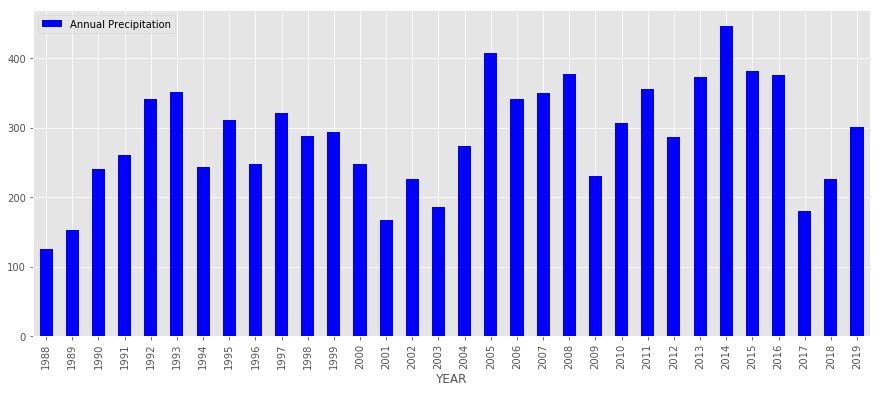

In [7]:
# Annual precipitation for all the data

annualData = finframe.mean(axis=1, skipna=True).sum(level="YEAR")
display(annualData)
annualData.name = "Annual Precipitation"

fig = plt.figure()
annualData.plot(kind='bar', color='b', grid=True)
plt.legend();
fig.set_size_inches(15,6)
plt.show()


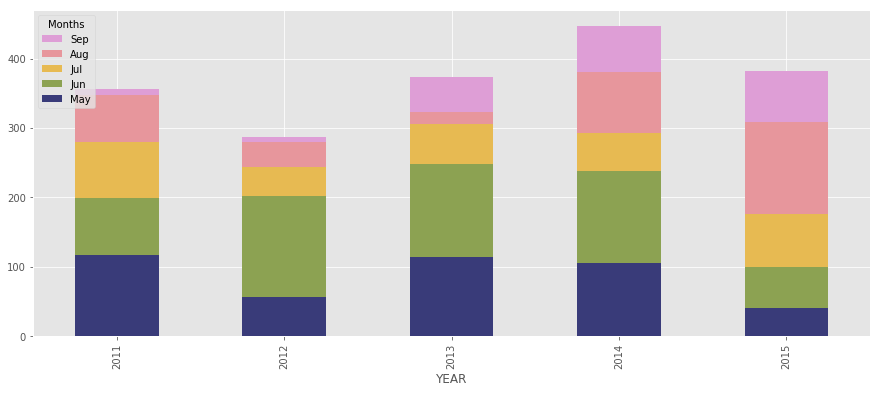

In [8]:
# Precipitation from 2011 to 2015 by month

compFrame = finframe.mean(axis=1, skipna=True).loc[2011:2015]
#display(compFrame)

fig = plt.figure()
axis = fig.add_subplot(1,1,1)
#display(compFrame.unstack())
compFrame.unstack().plot(kind='bar', stacked=True, ax=axis, colormap='tab20b')
month_labels = ['May','Jun','Jul','Aug','Sep']
handles, labels = axis.get_legend_handles_labels()
#display(labels)
#display(handles)
axis.legend(reversed(handles), reversed(month_labels), title='Months', loc='upper left')

fig.set_size_inches(15,6)
plt.show()